In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class opticalSystem:
    def __init__(self, lens1Focal, lens1to2Gap, lens2Focal, lens2to3Gap, lens3Focal):
        #floats, are what they say, in mms
        #below we set up the above as lists
        self.focal = [lens1Focal,lens2Focal,lens3Focal]
        self.delX = [100, lens1to2Gap, lens2to3Gap, 100]
        self.x = [-self.delX[0],0,self.delX[1],self.delX[2]+self.delX[1], self.delX[3]+self.delX[2]+self.delX[1]]
        #then make a list of the Rates of Convergance of our lenses
        self.c = [0,1/self.focal[0],1/self.focal[1],1/self.focal[2]]
    
    def simRay(self,rayC, y1):
        
        y0 = y1 + (rayC*self.delX[0])
        y1 = y1
        y2 = y1 - (rayC + self.c[1]*y1)*(self.delX[1])
        y3 = y2 - (rayC + self.c[1]*y1 + self.c[2]*y2)*self.delX[2]
        y4 = y2 - (rayC + self.c[1]*y1 + self.c[2]*y2 + self.c[3]*y3)*self.delX[3]
        
        y = np.array([y0,y1,y2,y3,y4])
        
        dy0 = (y1-y0)/self.delX[0]
        dy1 = (y2-y1)/self.delX[1]
        dy2 = (y3-y2)/self.delX[2]
        dy3 = (y4-y3)/self.delX[3]
        
        dy = [dy0,dy1,dy2,dy3]
        
        start = 0
        x = np.array(self.x)
        
        return np.array([x,y])

In [3]:
def imageRays(distance,yIn,lensRadius,numRays):
    #This function generates a list of indident rays defined by an objects location.
    #all in are floats except numRays, which is an int
    #outputs a numpy array of the rays slopes and x hit on a lens
    rays = []
    
    for i in np.linspace(-lensRadius,lensRadius,num=numRays):
        c = (yIn-i)/distance
        y = i
        rays.append(np.array([c,y]))
    
    
    return np.array(rays)

In [4]:
def intersection(x1,y1,x2,y2):
    #this takes the ray data I'm building up and returns any intersections between the two rays.
    #all inputs are lists of points that are connected by lines
    #IT IS ASSUMED ALL INPUT LISTS ARE OF SAME LENGTH, x1 = x2
    
    intersects = []
    #find intersections in the between lens regime
    for i in range(1,len(x1),1):
        denom = y1[i-1]-y1[i]-y2[i-1]+y2[i]
        
        if denom != 0:
            intX = (y1[i-1]-y2[i-1]) * (x1[i]-x1[i-1]) / denom
            intX += x1[i-1]
            intY = y2[i-1] + (intX-x2[i-1]) * (y2[i]-y2[i-1])/(x2[i]-x2[i-1])
            if intX <= x1[i] and intX >= x1[i-1]:
                intersects.append([intX, intY])
                
    
    #find any after lens intersections
    
    
    return np.array(intersects)

In [5]:
data = np.load("massLens2.npy")
data = np.array(data)
print(len(data))

953691


In [6]:
# params ordered inner image x, " y, outer image x, " y, focal length 1, 2, 3, gap1, gap2, optical center x, "y
def plotLenses(x, y, xname,yname,line):
    %matplotlib notebook
    plt.figure(figsize=(12, 6), dpi=80)
    #plt.xlim((-1.2,-.2))
    #plt.ylim((25,75))
    plt.scatter(x,y, s=2)
    if line:
        xlin=np.linspace(0,300,1000)
        plt.plot(xlin,xlin)
    plt.ylabel(yname)
    plt.xlabel(xname)
    plt.show()

<IPython.core.display.Javascript object>


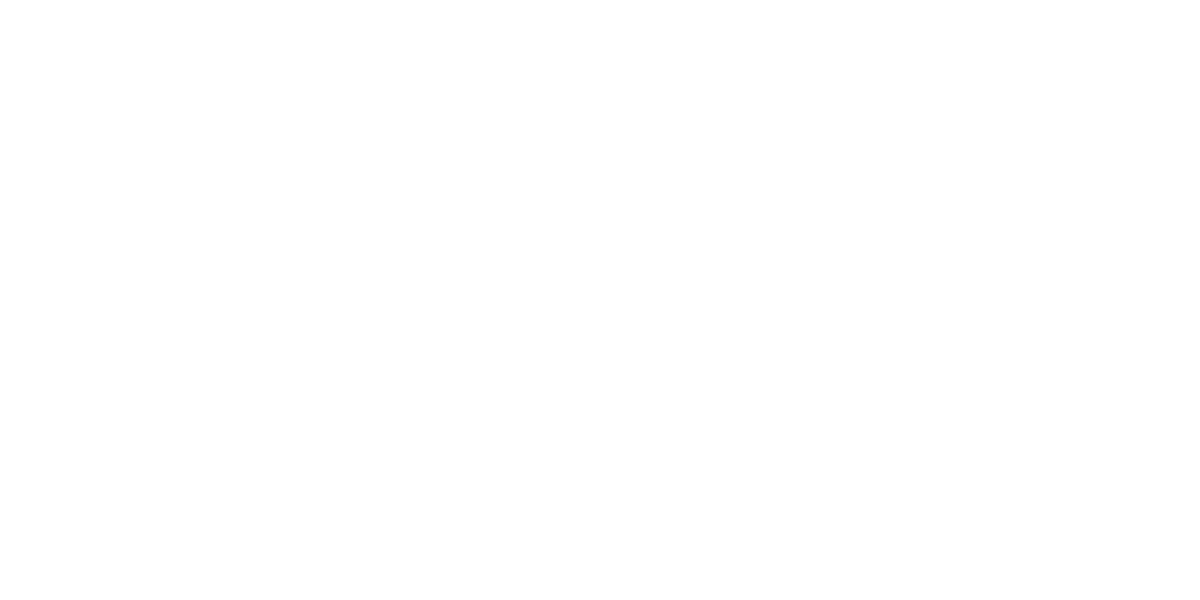

In [7]:
plotLenses(data[:,2], data[:,9], "Film Image Location","Optical Center",False)

/tmp/ipykernel_239/708611486.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plotLenses(data[:,1]/data[:,3], data[:,2]-data[:,9], "Filter over Film Size","Focal Distance",False)


<IPython.core.display.Javascript object>


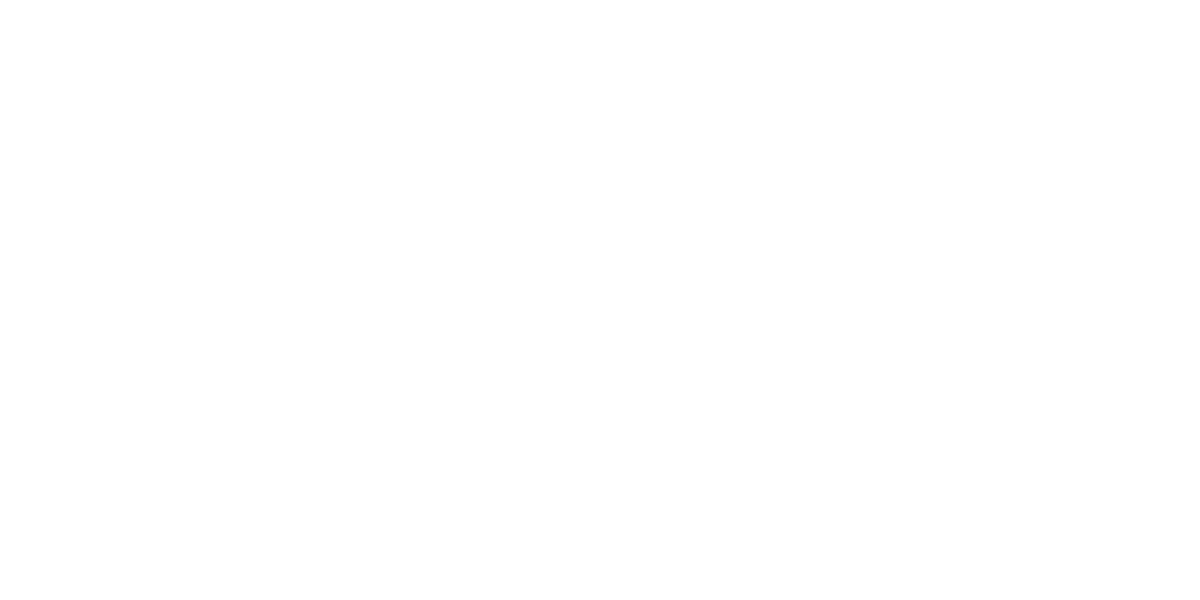

In [8]:
plotLenses(data[:,1]/data[:,3], data[:,2]-data[:,9], "Filter over Film Size","Focal Distance",False)

/tmp/ipykernel_239/1141275384.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  data = [data[x,:] for x in list(range(0, len(data))) if abs(data[x,1]/data[x,3])<25]


The list is now 847561 long


<IPython.core.display.Javascript object>


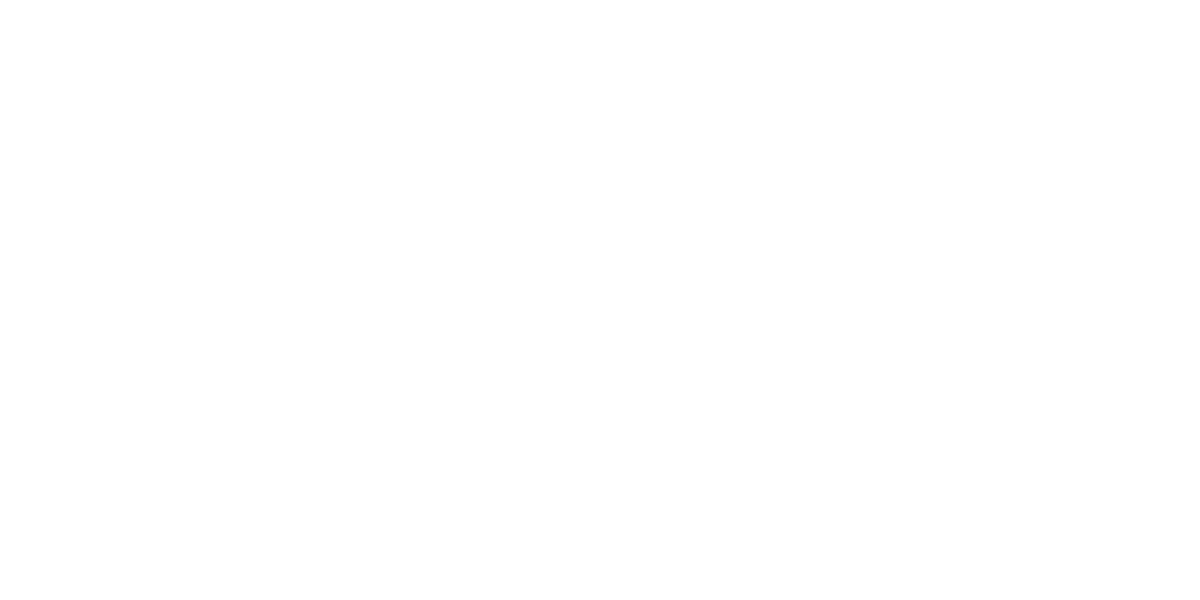

In [9]:
np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if abs(data[x,1]/data[x,3])<25]
data = np.array(data)

print("The list is now " + str(len(data)) + " long")

plotLenses(data[:,1]/data[:,3], data[:,2]-data[:,9], "Filter over Film Size","Focal Distance",False)

The list is now 671482 long


<IPython.core.display.Javascript object>


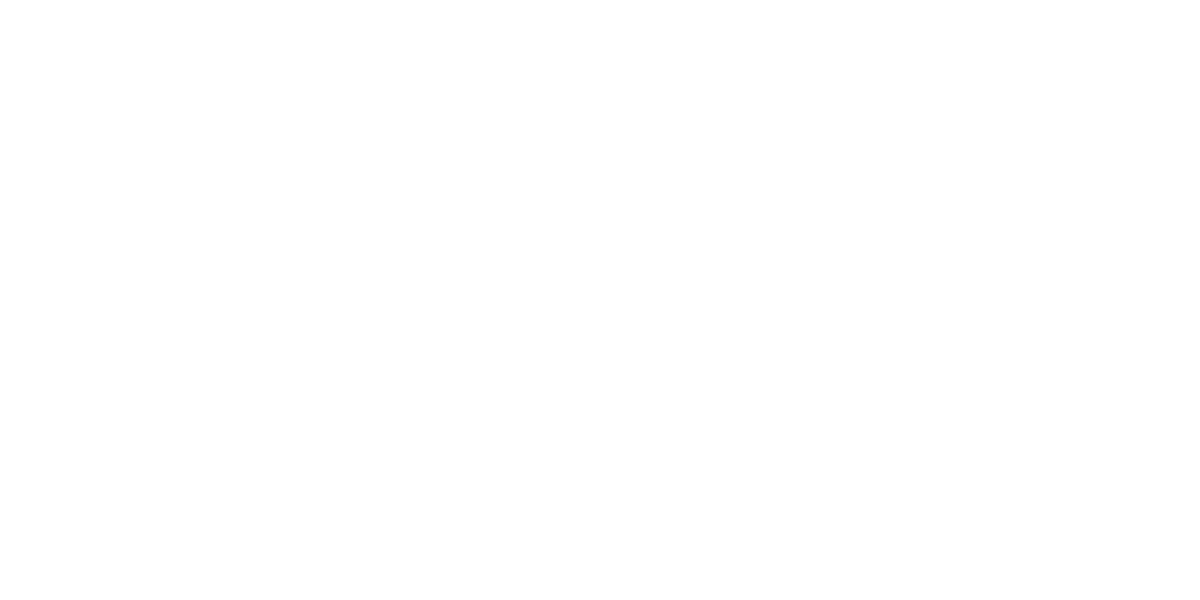

In [10]:
np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if abs(data[x,1]/data[x,3])>0.5]
data = np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if (data[x,2]-data[x,8]-data[x,7])>42]
data = np.array(data)

print("The list is now " + str(len(data)) + " long")

plotLenses(data[:,2]-data[:,8]-data[:,7], data[:,2]-data[:,9], "Backstop Length","Focal Distance",False)

The list is now 361 long


<IPython.core.display.Javascript object>


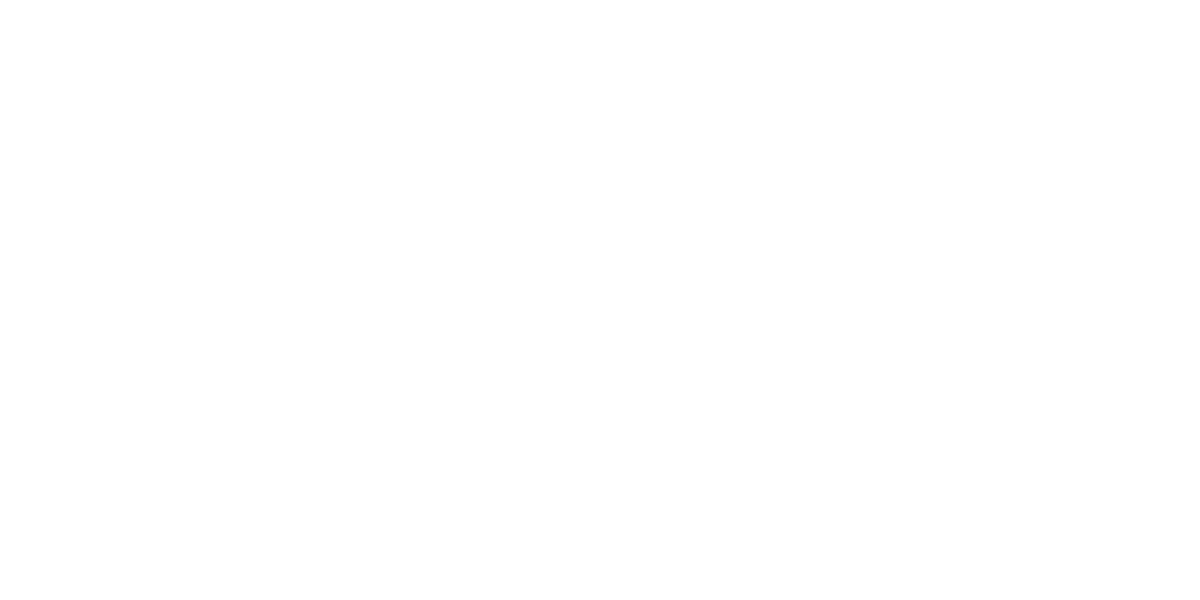

In [11]:
np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if (data[x,2]-data[x,9])<56]
data = np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if (data[x,2]-data[x,9])>54]
data = np.array(data)

print("The list is now " + str(len(data)) + " long")

plotLenses(data[:,2], data[:,2]-data[:,9], "Lens Length","Focal Length",False)

The list is now 286 long


<IPython.core.display.Javascript object>


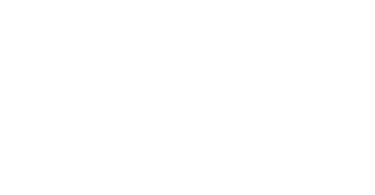

In [12]:
data = np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if abs(data[x,2])<325]
data = np.array(data)

print("The list is now " + str(len(data)) + " long")
plotLenses(data[:,1]/data[:,3], data[:,2]-data[:,9], "Film/Image Ratio","Focal Length",False)

The list is now 27 long


<IPython.core.display.Javascript object>


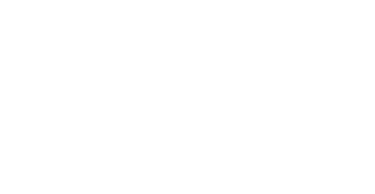

In [13]:
np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if abs(data[x,1]/data[x,3])>1.5]
data = np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if abs(data[x,1]/data[x,3])<2]
data = np.array(data)

print("The list is now " + str(len(data)) + " long")

plotLenses(data[:,1]/data[:,3], data[:,2]-data[:,9], "Filter over Film Size","Focal Distance",False)

<IPython.core.display.Javascript object>


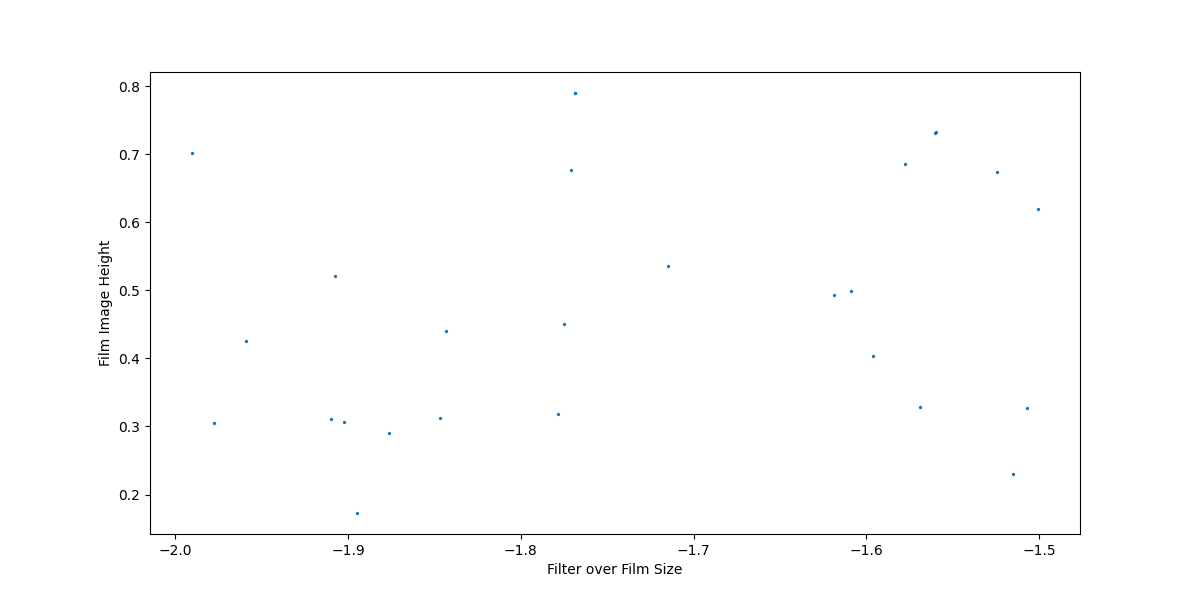

In [14]:
plotLenses(data[:,1]/data[:,3], data[:,3], "Filter over Film Size","Film Image Height",False)

FILTER OVER FILM
-1.8950759961437615
FOCAL POINT
54.61902026207508


<IPython.core.display.Javascript object>


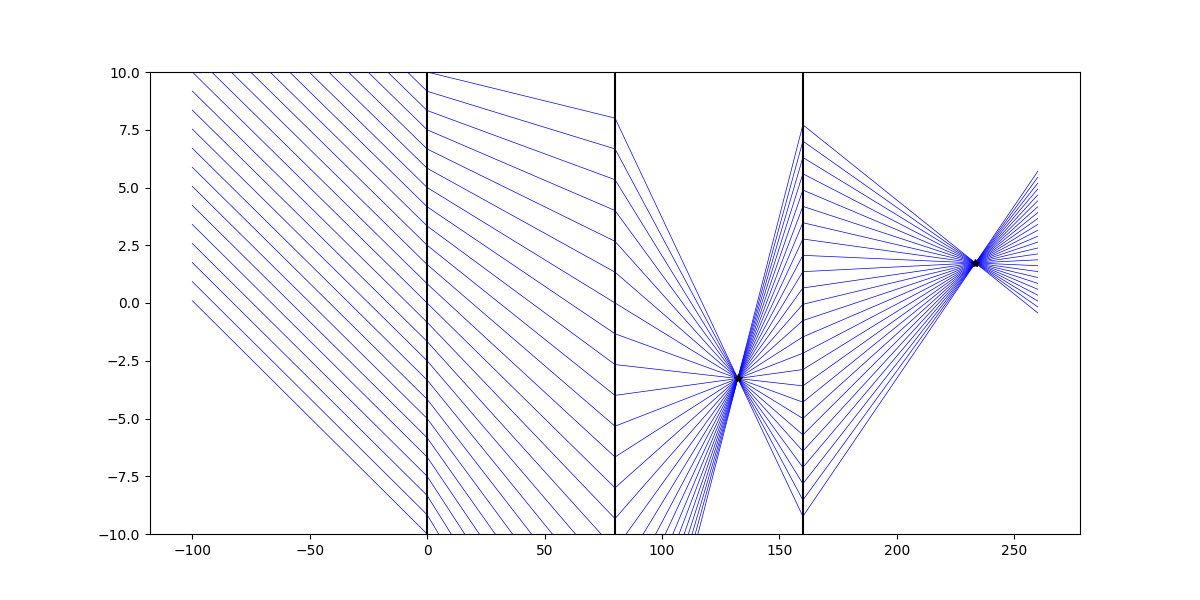

FILTER OVER FILM
-1.5153533926449396
FOCAL POINT
54.05755367397472


<IPython.core.display.Javascript object>


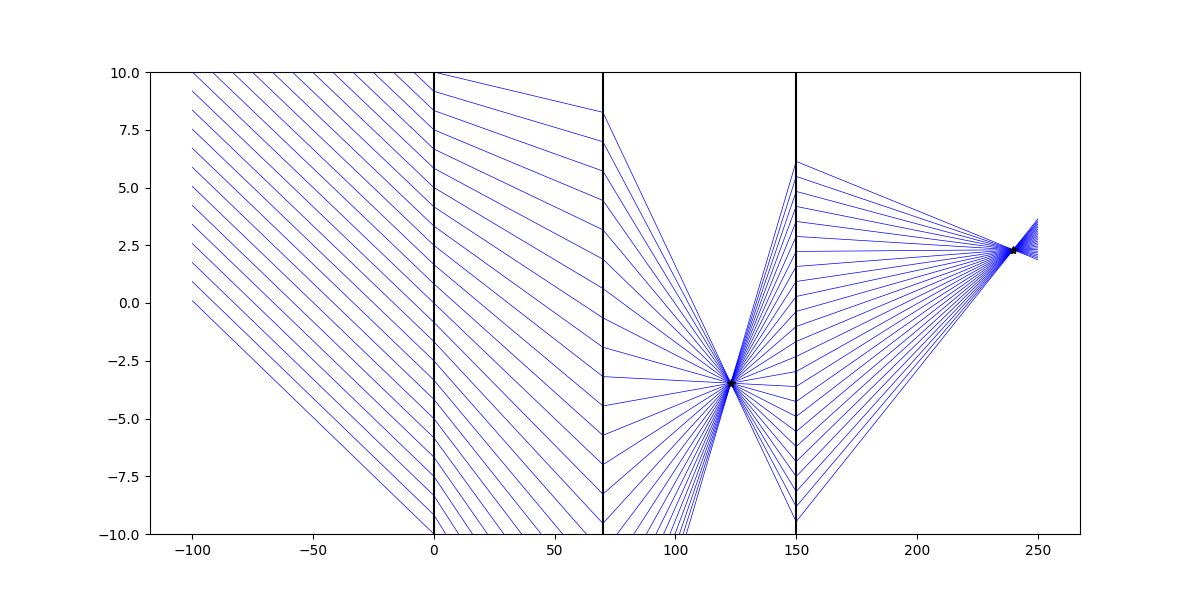

FILTER OVER FILM
-1.7748169282973671
FOCAL POINT
54.90748442991185


<IPython.core.display.Javascript object>


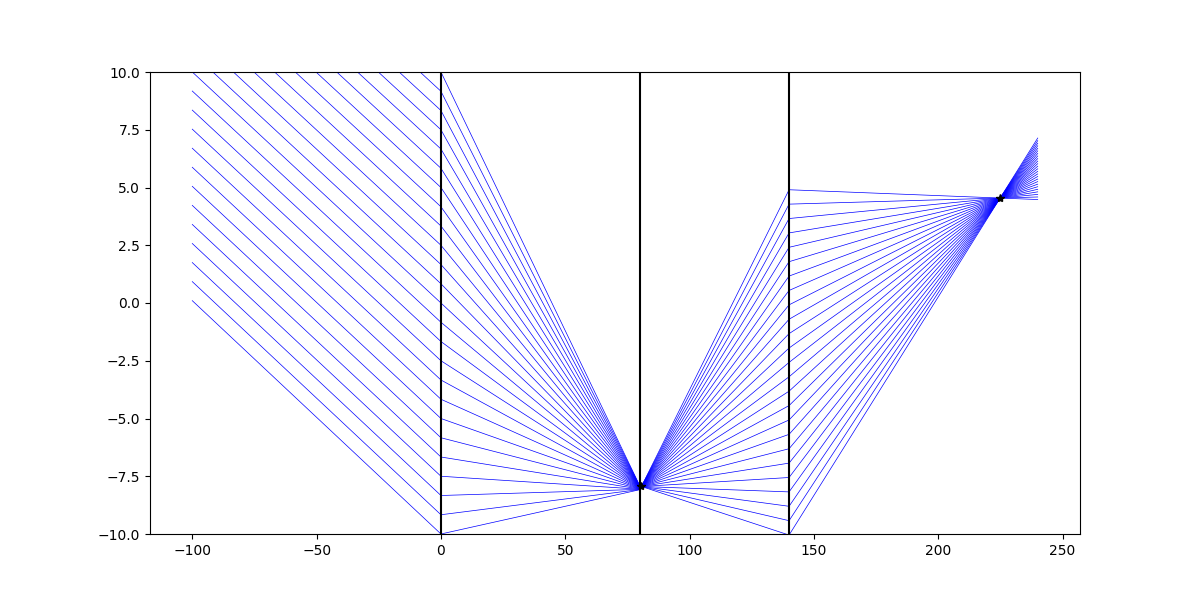

FILTER OVER FILM
-1.7787701625801546
FOCAL POINT
55.89586930817754


<IPython.core.display.Javascript object>


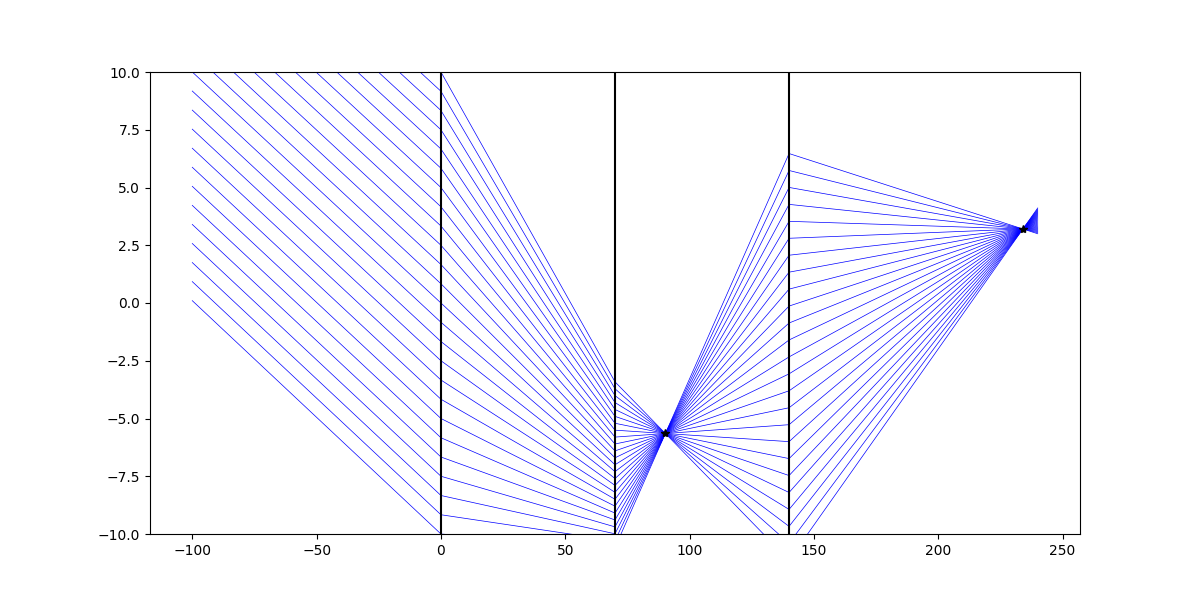

FILTER OVER FILM
-1.500794599961256
FOCAL POINT
54.28088088985129


<IPython.core.display.Javascript object>


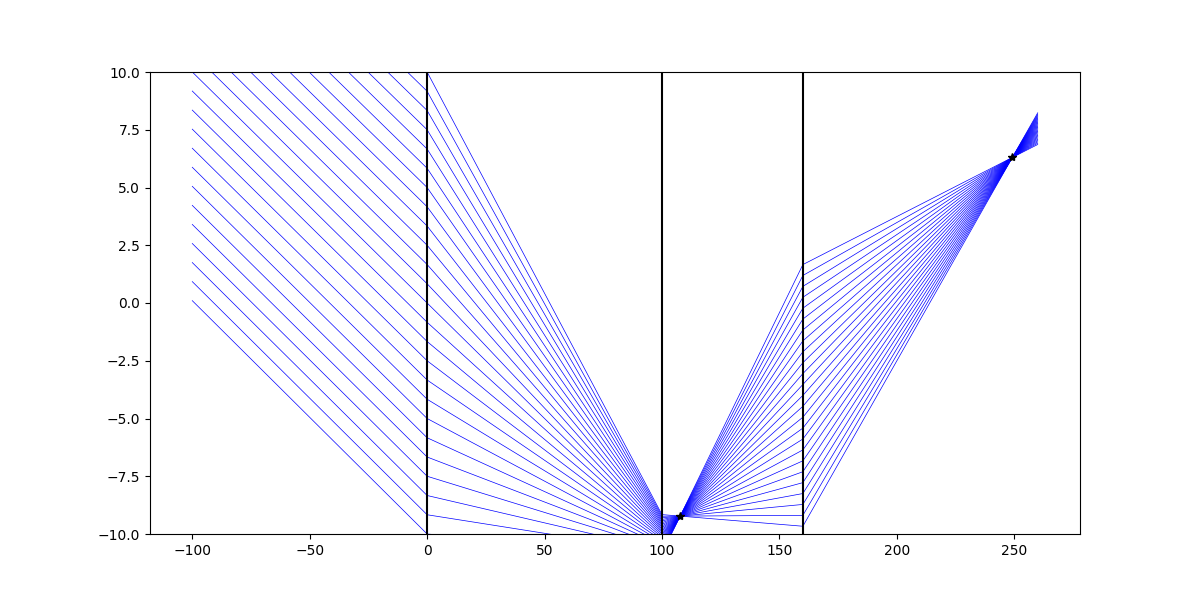

FILTER OVER FILM
-1.7711222258827783
FOCAL POINT
55.67816805907506


<IPython.core.display.Javascript object>


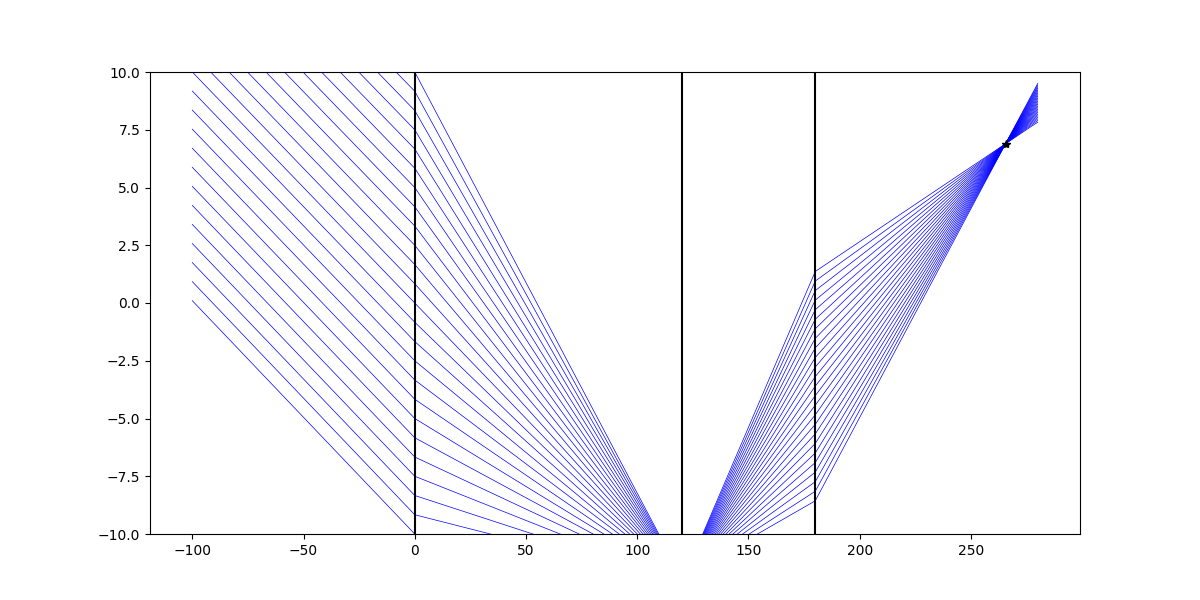

FILTER OVER FILM
-1.9777448514777507
FOCAL POINT
54.41748894579351


<IPython.core.display.Javascript object>


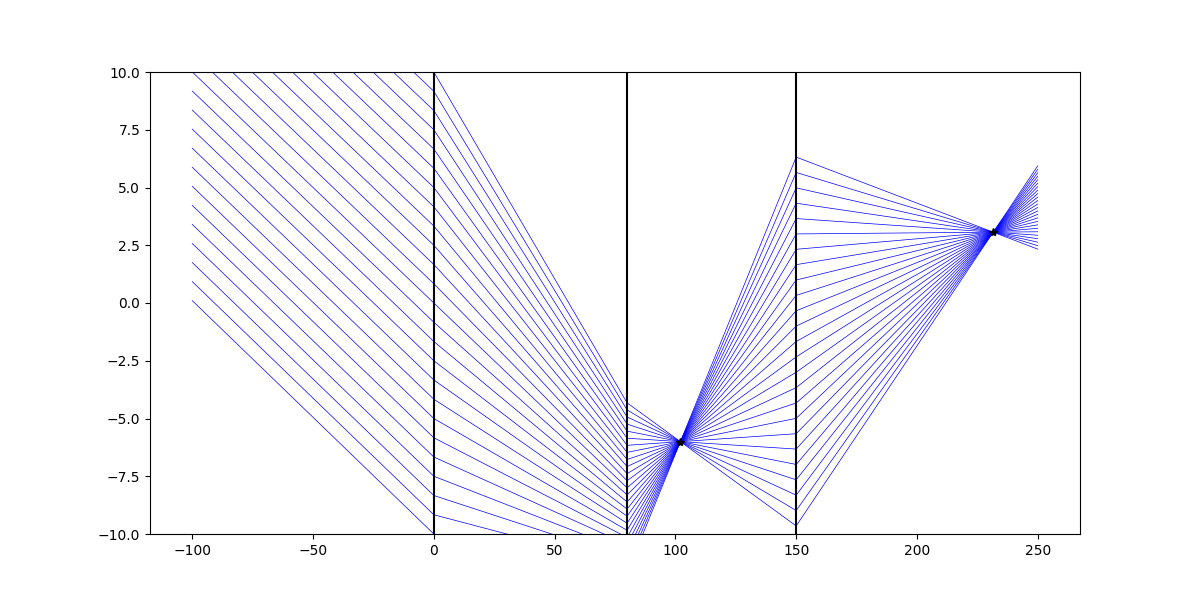

FILTER OVER FILM
-1.5962548732364643
FOCAL POINT
54.54246916325391


<IPython.core.display.Javascript object>


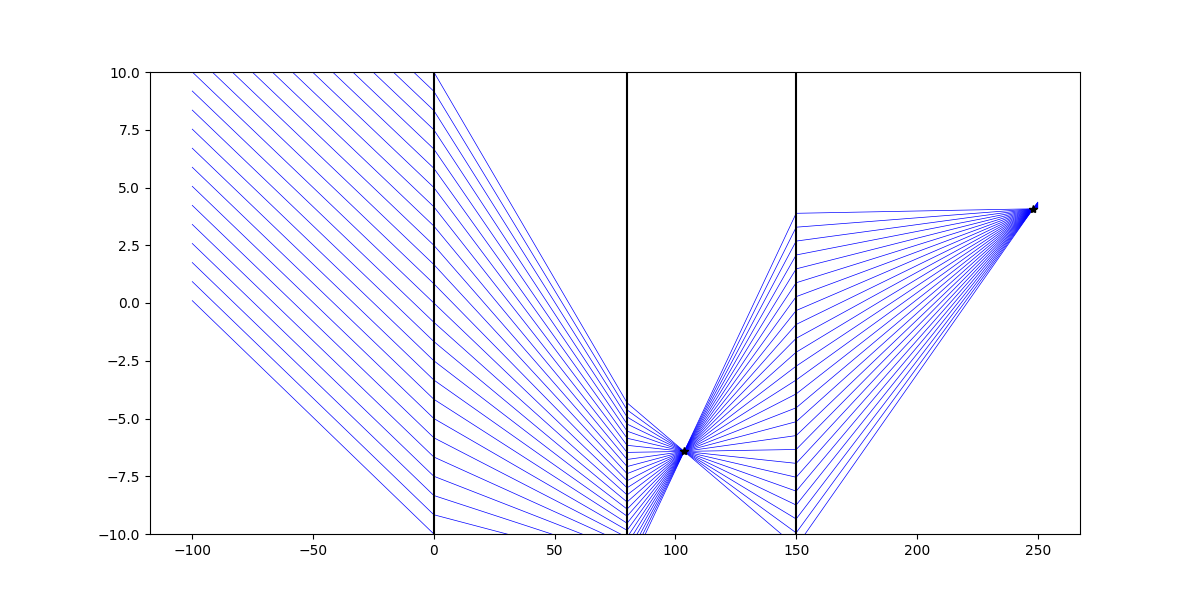

FILTER OVER FILM
-1.9591081120988059
FOCAL POINT
54.08054155038121


<IPython.core.display.Javascript object>


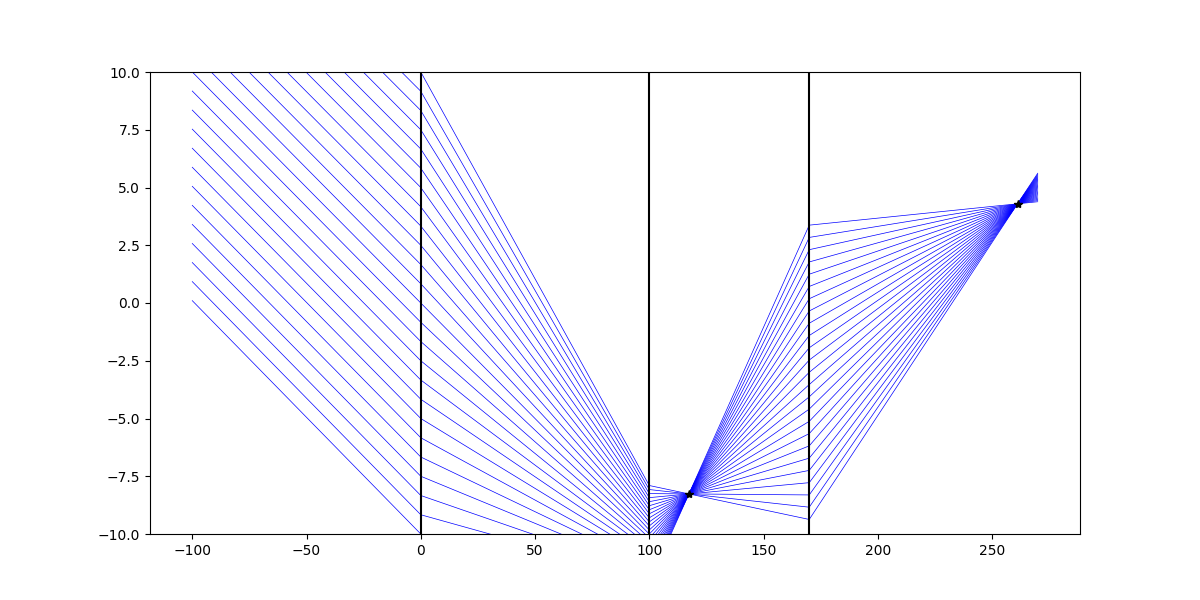

FILTER OVER FILM
-1.560219896744617
FOCAL POINT
55.70617608515914


<IPython.core.display.Javascript object>


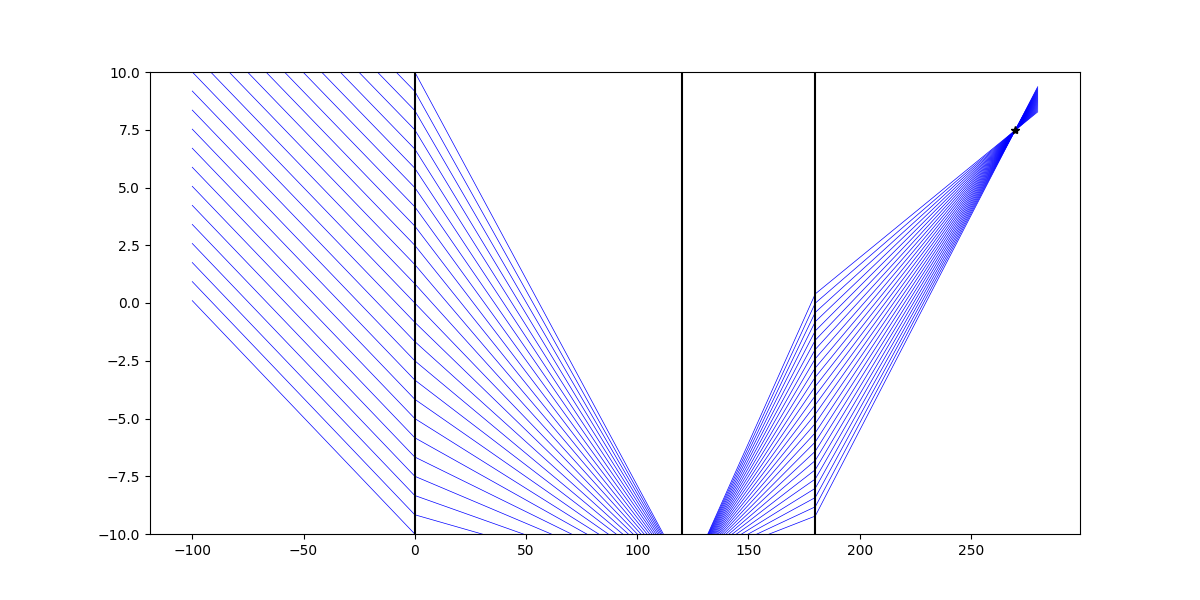

FILTER OVER FILM
-1.5598620908949459
FOCAL POINT
54.56991602753217


<IPython.core.display.Javascript object>


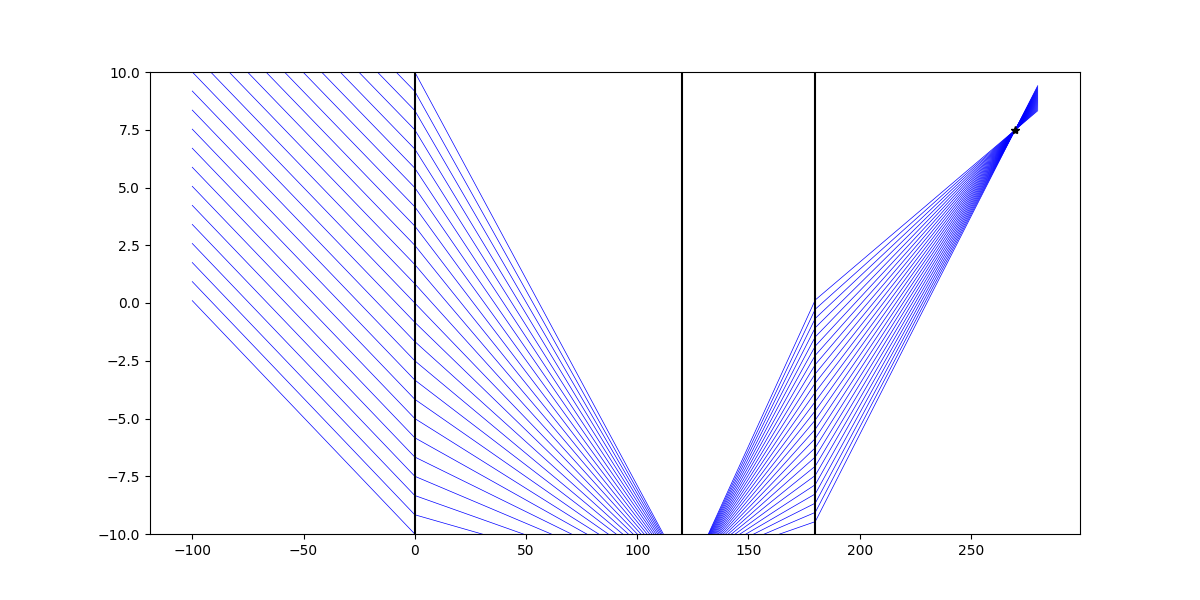

FILTER OVER FILM
-1.9097969104546852
FOCAL POINT
55.38774637412584


<IPython.core.display.Javascript object>


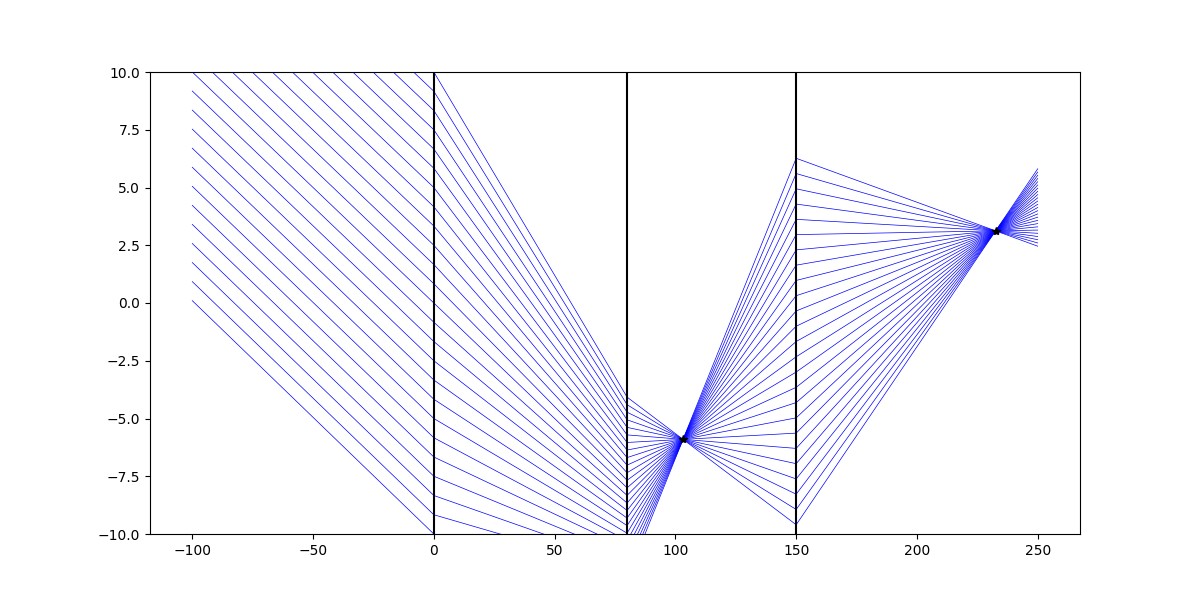

FILTER OVER FILM
-1.5774741056807704
FOCAL POINT
54.064023994350606


<IPython.core.display.Javascript object>


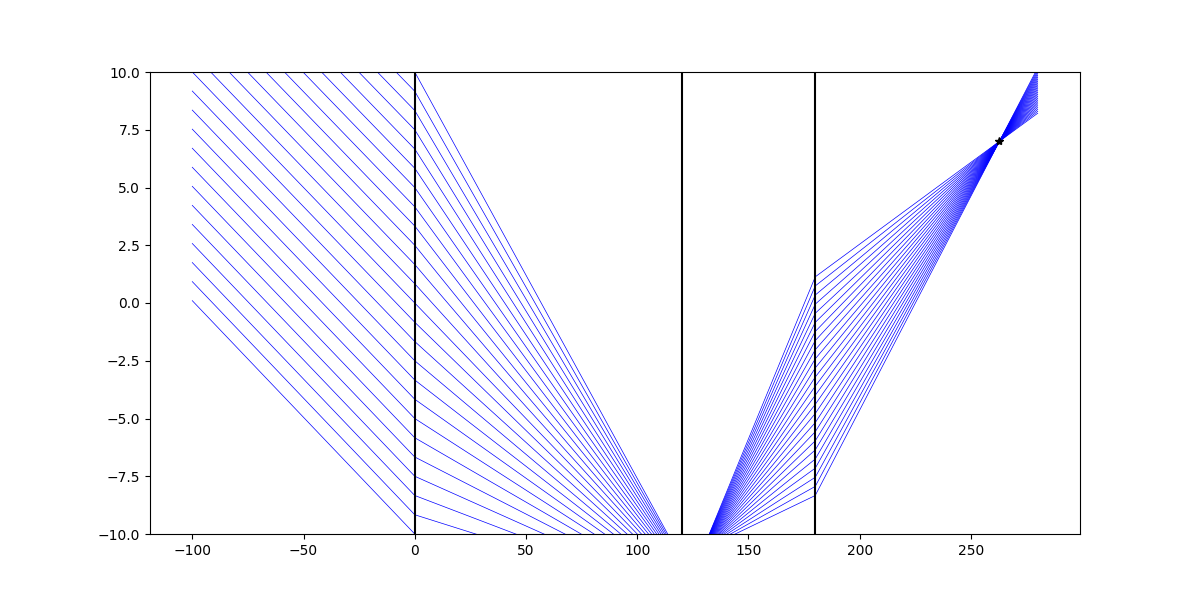

FILTER OVER FILM
-1.8435576283365842
FOCAL POINT
55.999531494733304


<IPython.core.display.Javascript object>


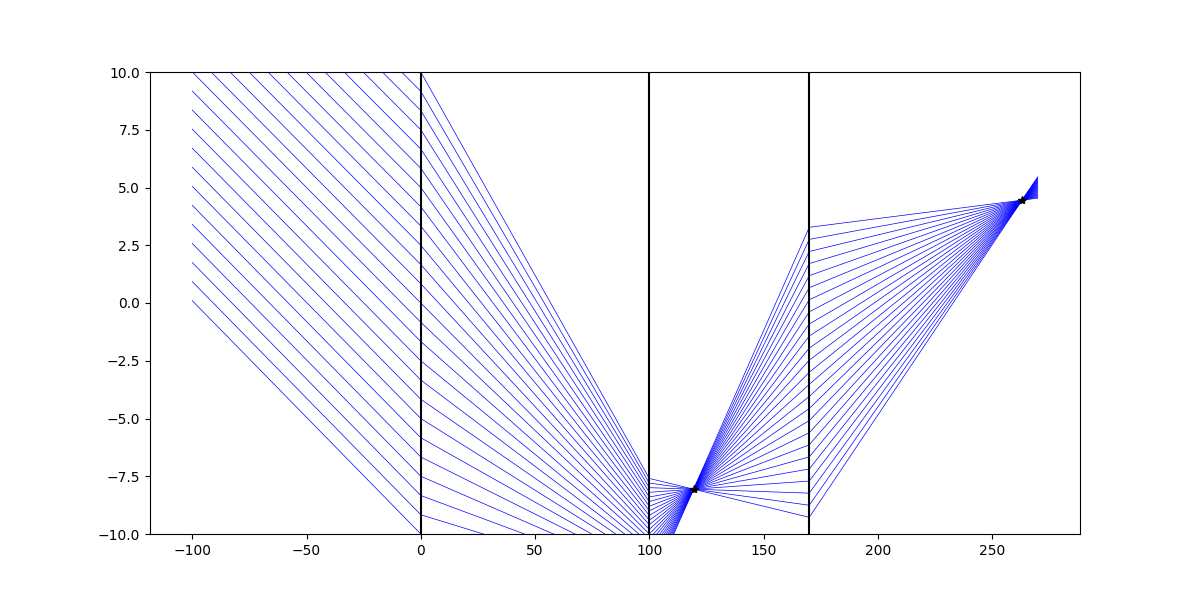

FILTER OVER FILM
-1.907654747438856
FOCAL POINT
55.87174410388073


<IPython.core.display.Javascript object>


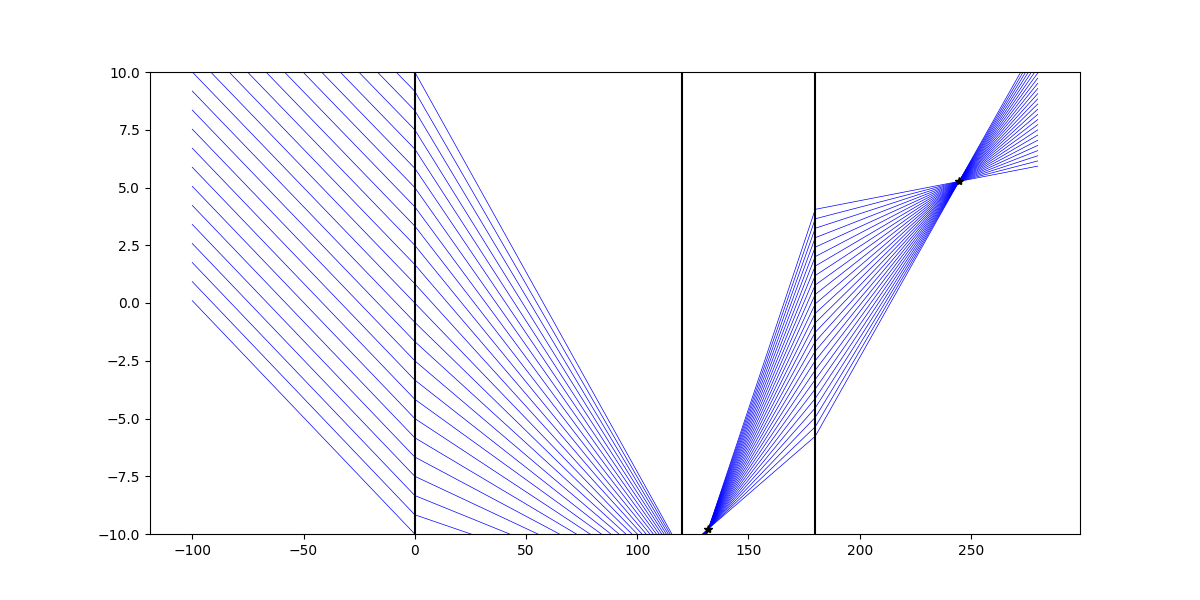

FILTER OVER FILM
-1.9026048104831852
FOCAL POINT
54.2182168525068


<IPython.core.display.Javascript object>


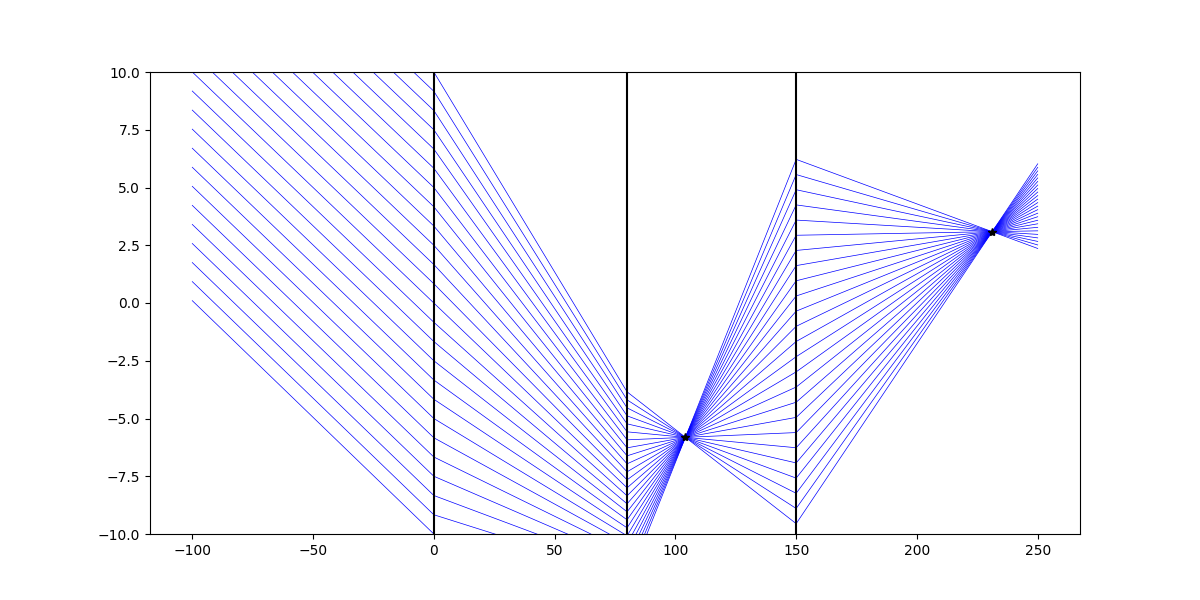

FILTER OVER FILM
-1.5242601341087154
FOCAL POINT
55.539231853802335


<IPython.core.display.Javascript object>


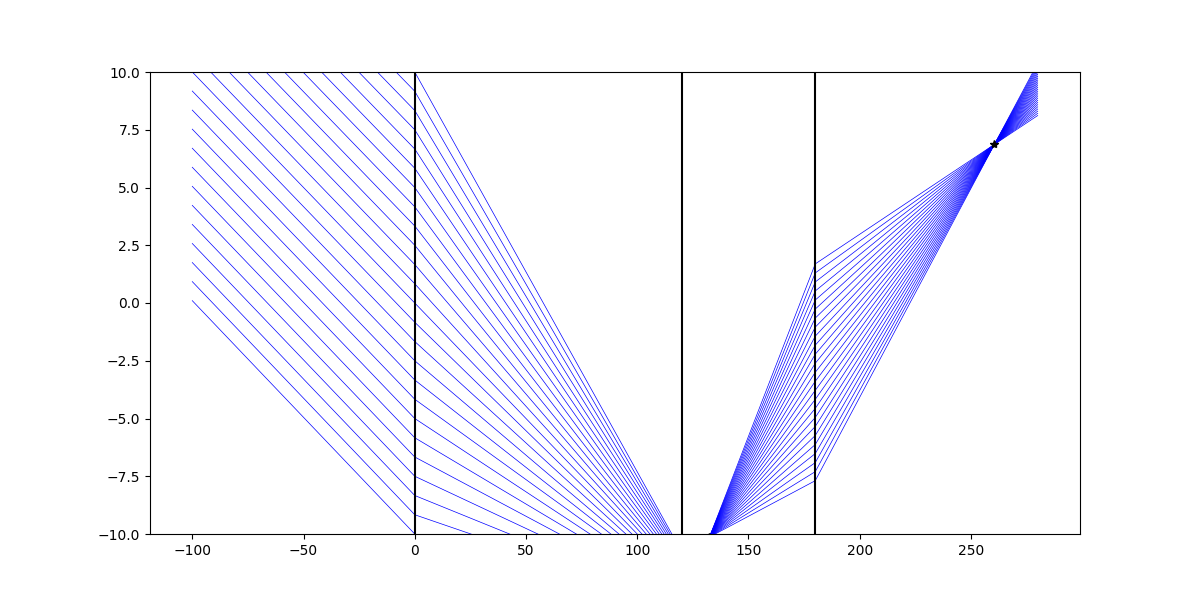

FILTER OVER FILM
-1.8465976606805168
FOCAL POINT
55.062114324537305


<IPython.core.display.Javascript object>


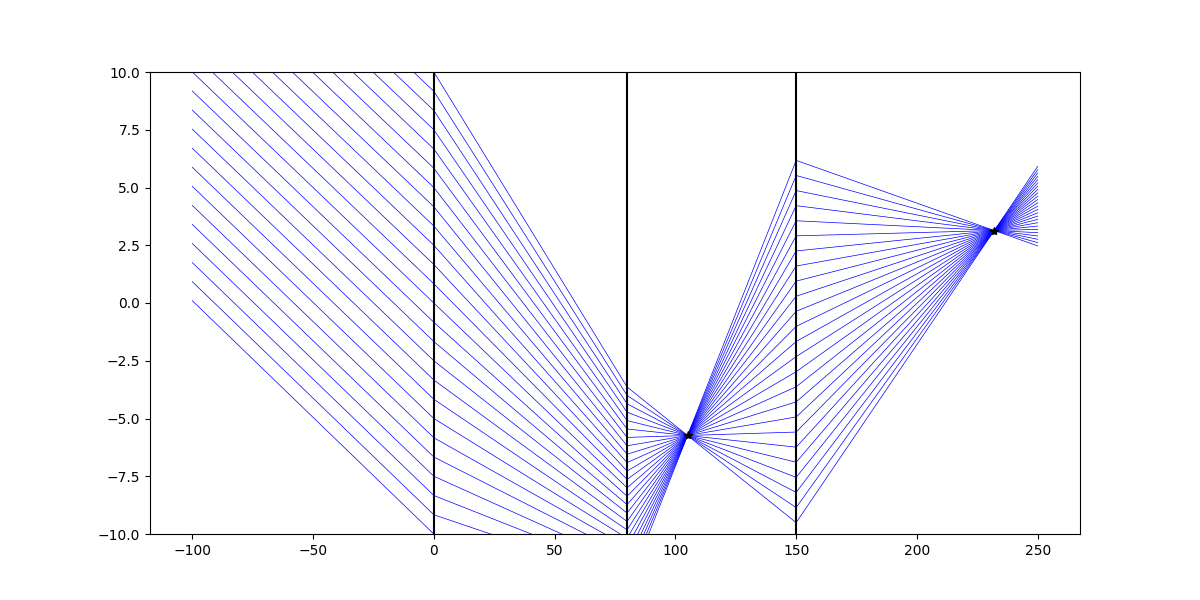

FILTER OVER FILM
-1.9902261288156342
FOCAL POINT
55.889085970223164


<IPython.core.display.Javascript object>


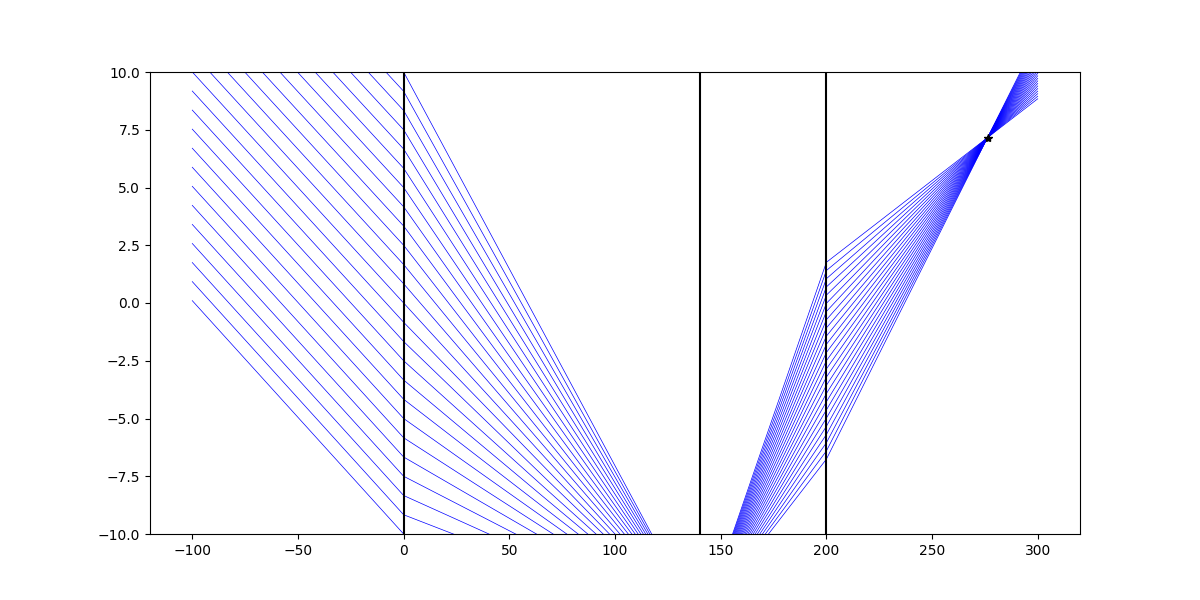

FILTER OVER FILM
-1.7687244188139246
FOCAL POINT
55.80374953995505


/tmp/ipykernel_239/1999611867.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12, 6), dpi=80)


<IPython.core.display.Javascript object>


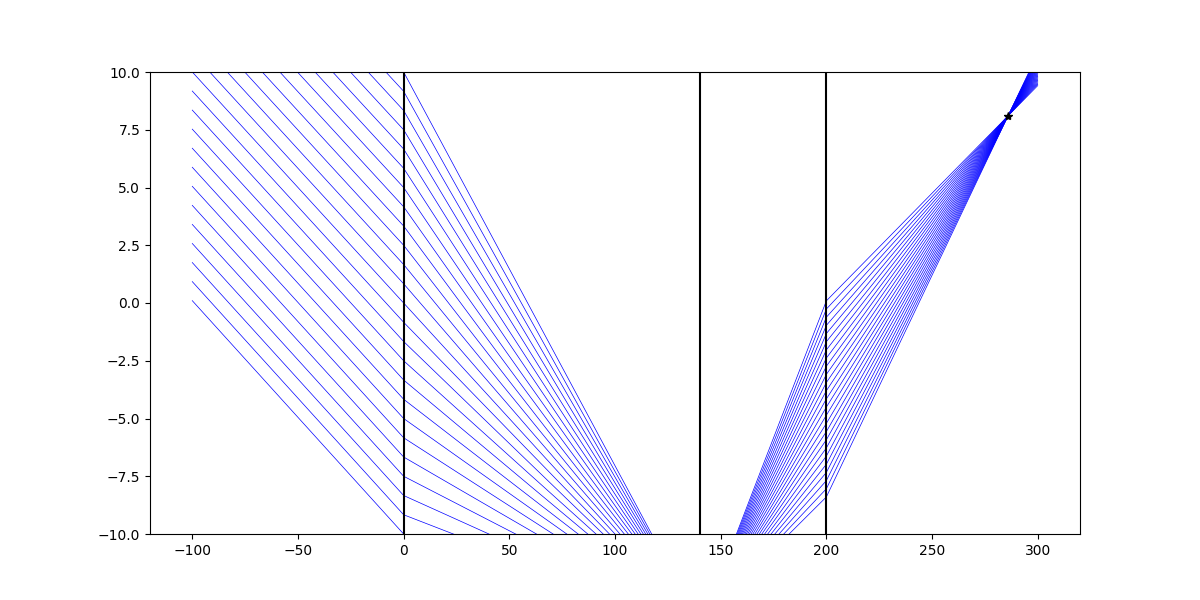

FILTER OVER FILM
-1.6189271705496089
FOCAL POINT
55.5887911145397


<IPython.core.display.Javascript object>


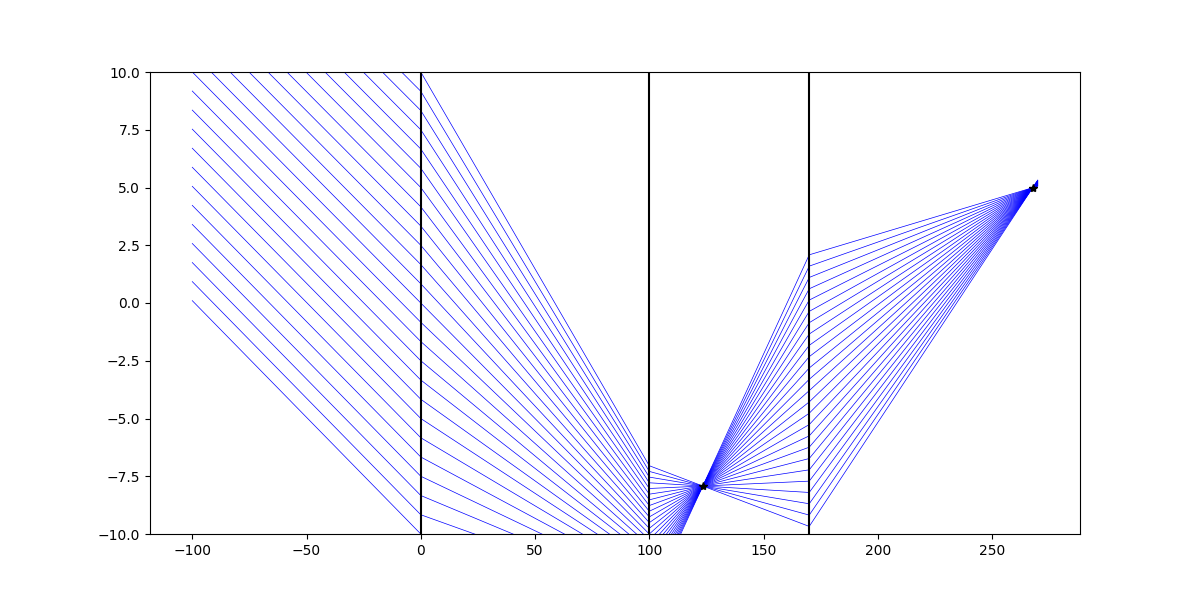

FILTER OVER FILM
-1.768723800180643
FOCAL POINT
54.46869510403005


<IPython.core.display.Javascript object>


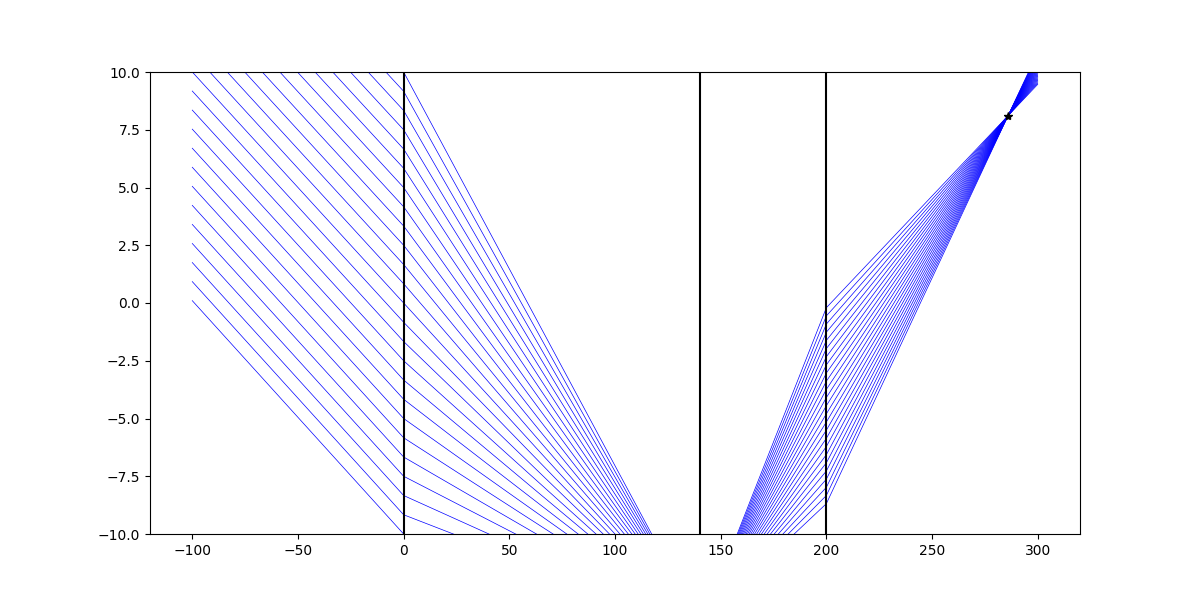

FILTER OVER FILM
-1.6087020873402336
FOCAL POINT
54.518365236726936


<IPython.core.display.Javascript object>


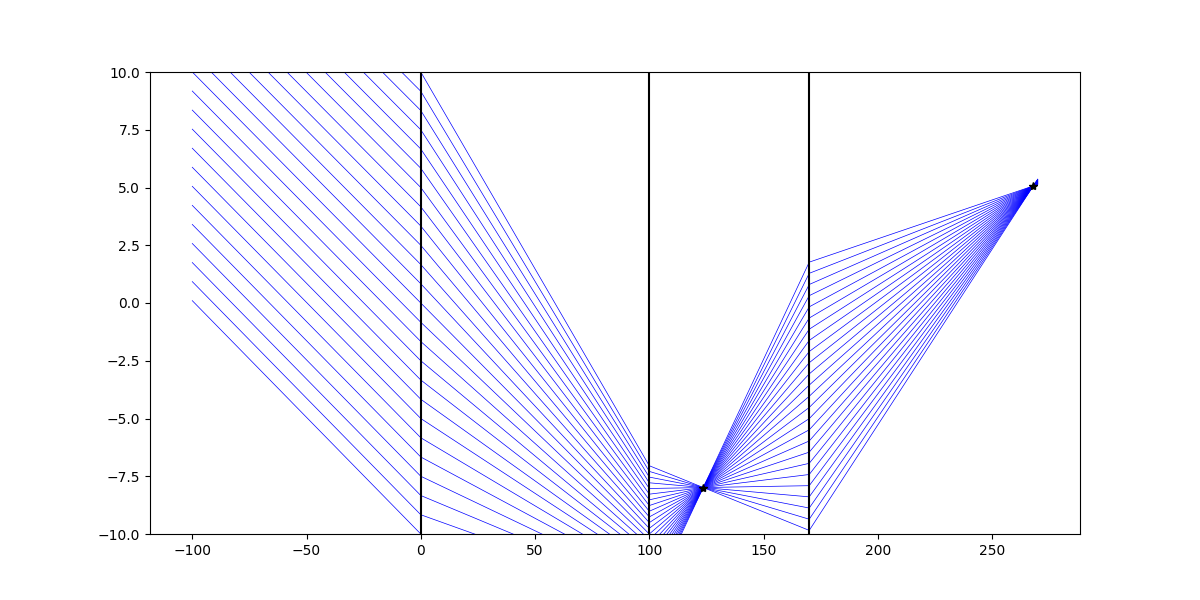

FILTER OVER FILM
-1.569087016946294
FOCAL POINT
55.99826877383302


<IPython.core.display.Javascript object>


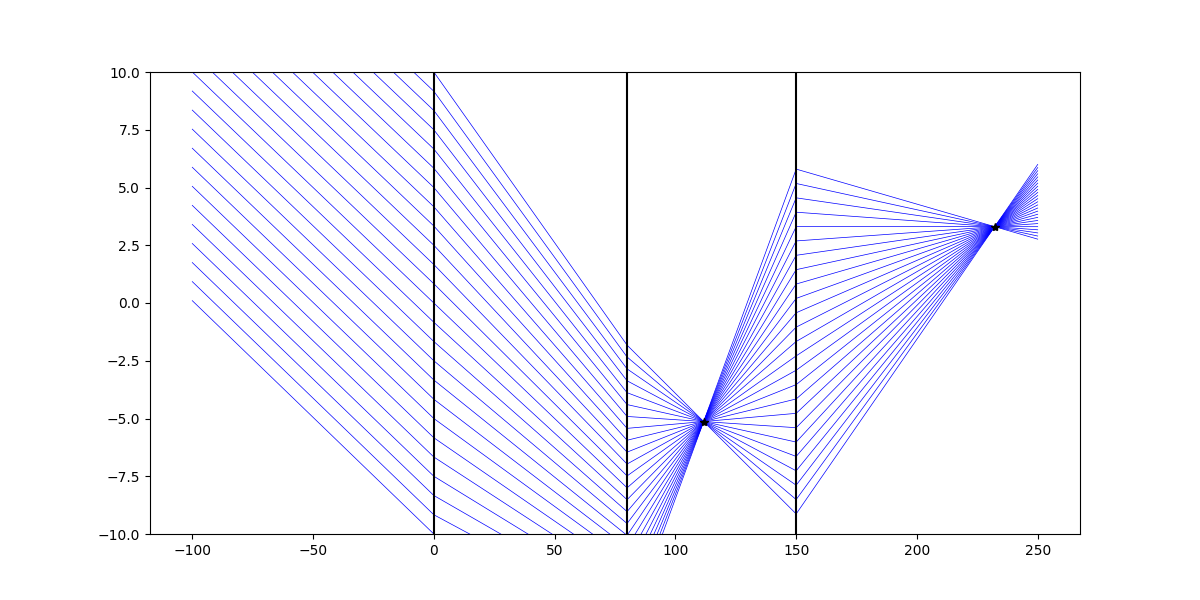

FILTER OVER FILM
-1.7146954300338477
FOCAL POINT
54.53627610858189


<IPython.core.display.Javascript object>


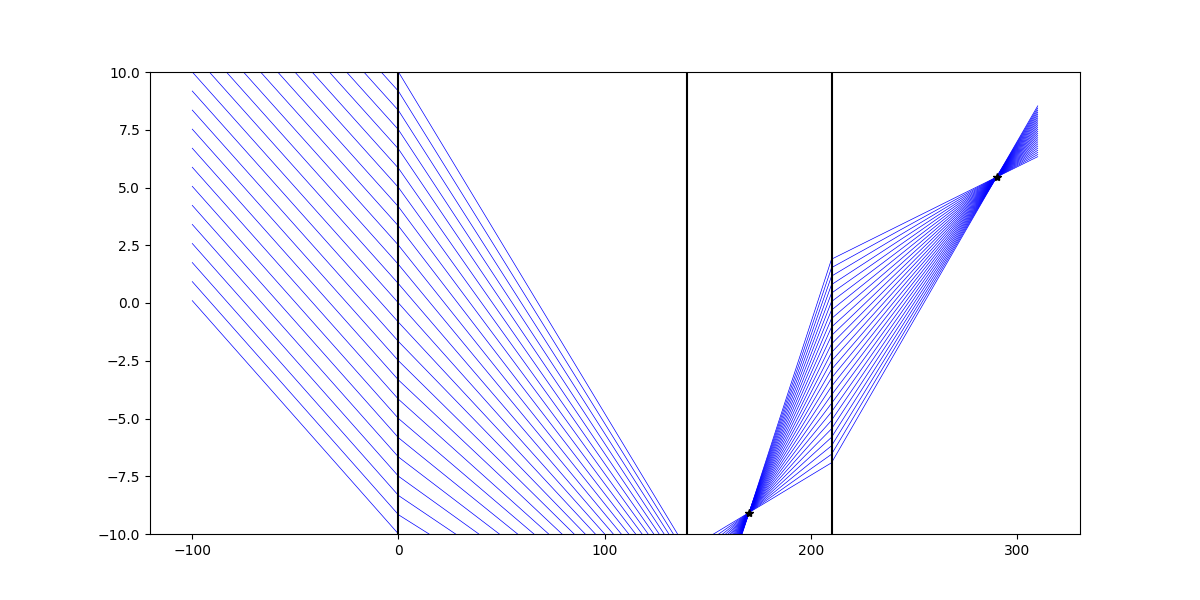

FILTER OVER FILM
-1.507269714316266
FOCAL POINT
54.52090968883243


<IPython.core.display.Javascript object>


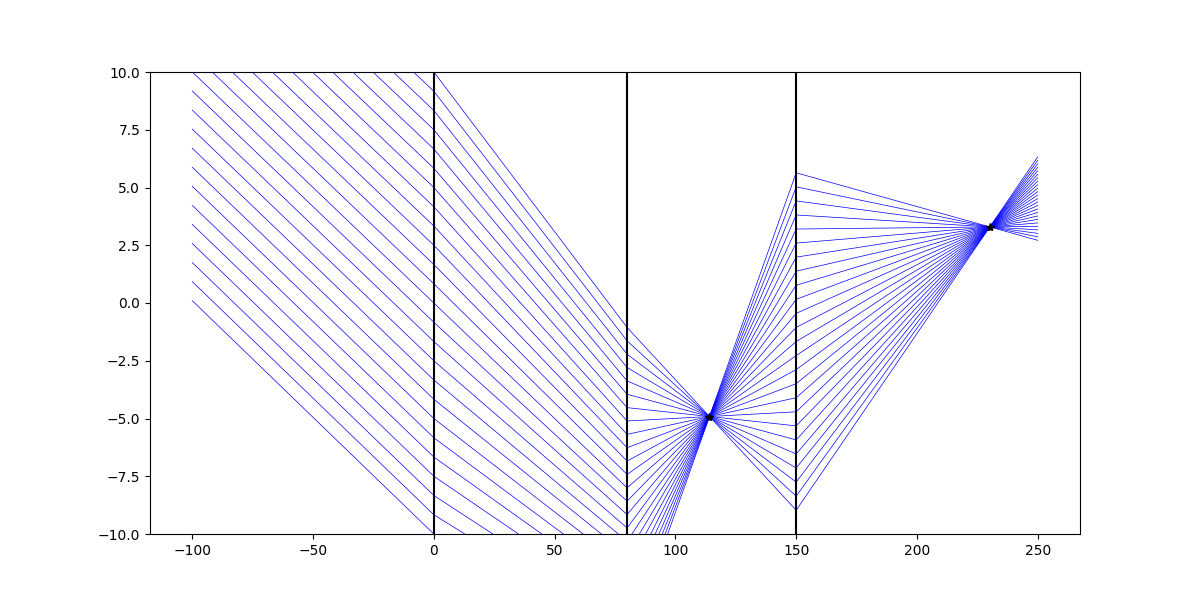

FILTER OVER FILM
-1.8763098668076814
FOCAL POINT
55.92120203451222


<IPython.core.display.Javascript object>


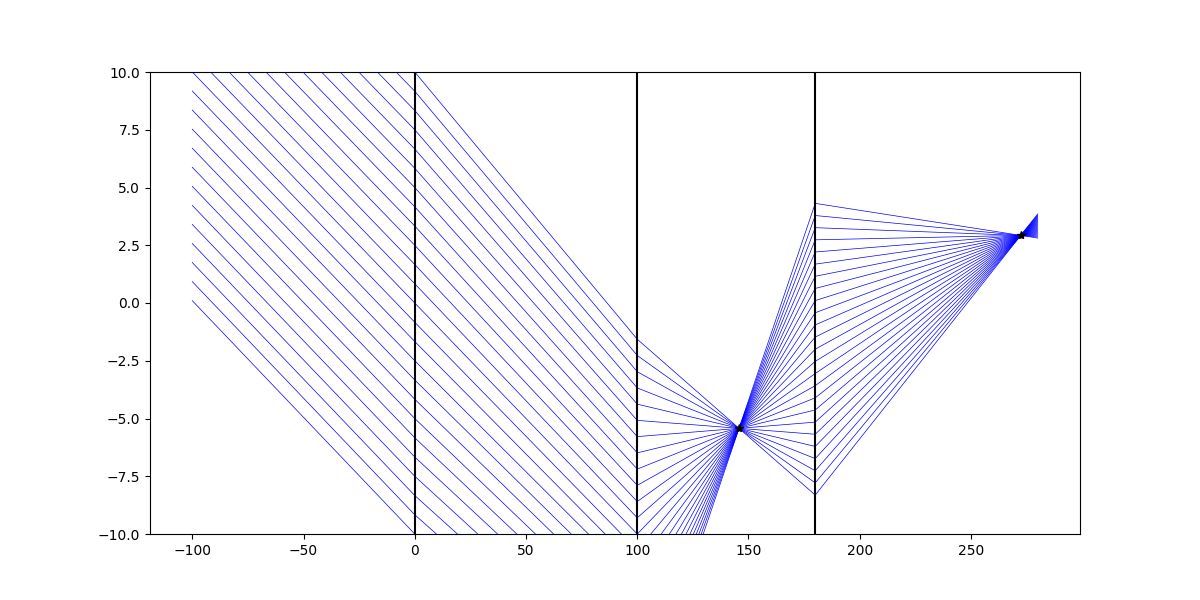

In [15]:
for i in np.arange(0,len(data),1):
    #EXAMPLE:intersection of two rays put through an optical system, as well as graphic output of said rays
    lens1Focal = data[i,4]
    lens2Focal = data[i,5]
    lens3Focal = data[i,6]
    gap1 = data[i,7]
    gap2 = data[i,8]
    lens1 = opticalSystem(lens1Focal, gap1, lens2Focal, gap2, lens3Focal)
    rays = imageRays(9999,1000,10,25)
    
    print("FILTER OVER FILM")
    print(data[i,1]/data[i,3])
    print("FOCAL POINT")
    print(data[i,2]-data[i,9])
    
    x = []
    y = []

    for i in range(0,len(rays[:,0]),1):
        tracedRay = lens1.simRay(rays[i,0],rays[i,1])
        x.append(tracedRay[0])
        y.append(tracedRay[1])

    plt.figure(figsize=(12, 6), dpi=80)
    plt.ylim((-10, 10))
    for i in range(0,len(rays[:,0]),1):
        plt.plot(x[i],y[i],'b',linewidth=0.5)


    plt.axvline(x = 0, color = 'k', label = 'axvline - full height')
    plt.axvline(x = gap1, color = 'k', label = 'axvline - full height')
    plt.axvline(x = gap2+gap1, color = 'k', label = 'axvline - full height')


    images = intersection(x[0],y[0],x[9],y[9])
    plt.plot(images[:,0],images[:,1],'k*')

In [16]:
output = data[:,[4,5,6]] 
print(data[:,[4,5,6]],data[:,1]/data[:,3])

[[-135.   42.   48.]
 [-135.   42.   54.]
 [  80.   42.   54.]
 [ 108.   42.   60.]
 [ 108.   50.   53.]
 [ 120.   50.   54.]
 [ 125.   42.   54.]
 [ 125.   48.   60.]
 [ 125.   50.   60.]
 [ 125.   53.   54.]
 [ 125.   54.   54.]
 [ 130.   42.   54.]
 [ 130.   50.   50.]
 [ 130.   50.   60.]
 [ 135.   42.   42.]
 [ 135.   42.   53.]
 [ 135.   48.   48.]
 [ 140.   42.   53.]
 [ 140.   48.   50.]
 [ 140.   53.   54.]
 [ 140.   53.   60.]
 [ 140.   54.   54.]
 [ 140.   54.   60.]
 [ 205.   42.   50.]
 [ 205.   53.   50.]
 [ 255.   42.   48.]
 [ 600.   50.   60.]] [-1.895076   -1.51535339 -1.77481693 -1.77877016 -1.5007946  -1.77112223
 -1.97774485 -1.59625487 -1.95910811 -1.5602199  -1.55986209 -1.90979691
 -1.57747411 -1.84355763 -1.90765475 -1.90260481 -1.52426013 -1.84659766
 -1.99022613 -1.76872442 -1.61892717 -1.7687238  -1.60870209 -1.56908702
 -1.71469543 -1.50726971 -1.87630987]


In [17]:
print(data[:,5])

[42. 42. 42. 42. 50. 50. 42. 48. 50. 53. 54. 42. 50. 50. 42. 42. 48. 42.
 48. 53. 53. 54. 54. 42. 53. 42. 50.]
